In [1]:
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
import geopandas as gp

%matplotlib inline
plt.style.use('ggplot')

In [2]:
priority_deptos = [ 5, 12, 10, 9, 11, 18, 19 ]


In [3]:
datadf = pd.read_csv(\
     "../../../../Outcome Measurement Data/TUBERCULOSIS/GTM - Tx cohort data 2012-2016.csv", index_col = 0)
extradf = pd.read_csv(\
     "../../../../Outcome Measurement Data/TUBERCULOSIS/COHORTES/GTM - Tx Cohort Data - Extra tables.csv")
deptos = gp.read_file("../../../../Covariates and Other Data/GIS/GT-IGN-cartografia_basica-Departamentos.geojson")

In [9]:
def safeToFloat(inputVal):
    try: 
        return float(inputVal)
    except:
        return inputVal
extradf.value = extradf.value.map(safeToFloat)

In [14]:
# After reviewing the non-float values, I've seen those are actually NaNs.
#extradf[extradf.value.map(lambda x: type(x)!= float)]
extradf.loc[extradf.value.map(lambda x: type(x)!= float),"value"] = np.nan 

In [44]:
temp = extradf[(extradf.table == "SR") & (extradf.column == "Número de SR examinados")]\
    .groupby(["year", "deptocode"]).value.sum(dropna=True).unstack(0)
temp.index = temp.index.map(lambda x: str(int(x*100)) if x != 1 else "101")


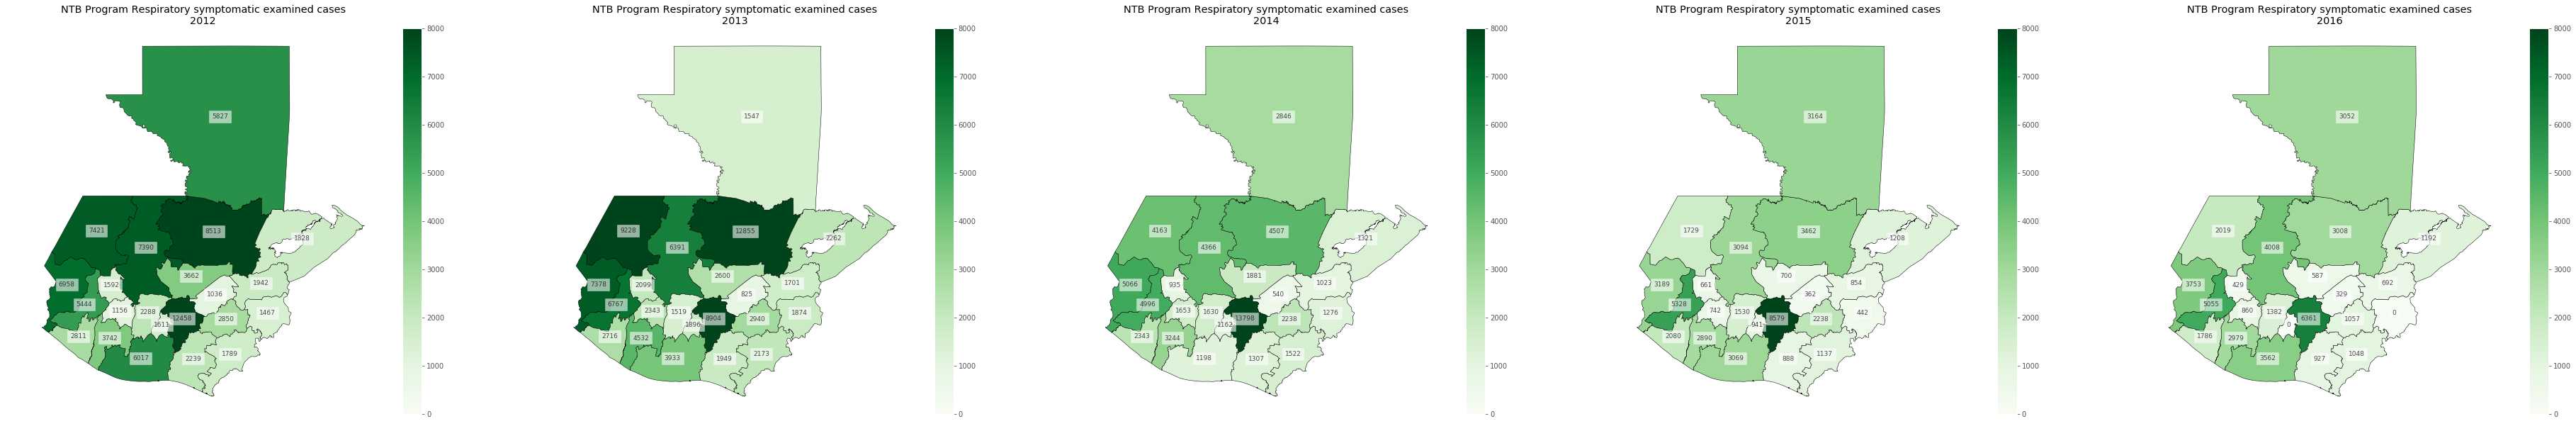

In [48]:
side = 10
vmin = 0
vmax = 8000 # temp.max().max()
n = 5
f, axes_ = plt.subplots(1, n, figsize=(side*n*1.3, side))
i = 2012
axes = axes_

for ax in axes:
    temp2 = deptos.merge(temp[[i]], 
                 left_on="CODIGO", right_index = True ).fillna(0)
    temp2.plot(i, cmap = "Greens", legend=True, 
               ax= ax, vmin = vmin, vmax = vmax, edgecolor="black")
    ax.axis('off')
    ax.set_title("NTB Program Respiratory symptomatic examined cases\n"+ str(i))
    for idx, deptorow in temp2.iterrows():
        ax.annotate(s= str(int(deptorow[i])), 
                 xy=(deptorow.geometry.centroid.x, 
                     deptorow.geometry.centroid.y), 
                horizontalalignment='center', fontsize = 9, alpha = 0.7,
                color = "black", bbox={"color": "white", "alpha":0.6})

    i += 1
f.patch.set_facecolor('white')


13798.0